## 2024S-T3 AML 3104 - Neural Networks and Deep Learning

Instructor: Ishant Gupta

Student: Antonio Carlos De Mello Mendes - c0866063@mylambton.ca

### Campus Recruitment Prediction

In [1]:
# Loading libraries
import pandas as pd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
file = "Train.csv"
df_crp = pd.read_csv(file, header = 0)

# Display the first 5 entries of df_pat Dataframe
df_crp.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


* Summary of data types, missing data, and number of rows

In [3]:
df_crp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [4]:
df_crp.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

* Distribution of categorical and numerical data

In [5]:
# Check the distributions for categorical data
df_crp[['gender','ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']].describe(include='all')

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215.000000,215,215,215,215,215,215,215
unique,NaN,2,2,3,3,2,2,2
top,NaN,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,NaN,116,131,113,145,141,120,148
mean,0.353488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.479168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check the frequency distributions for the target variable
df_crp['status']=df_crp['status'].str.strip()
df_crp['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [7]:
# Check the frequency distributions for gender column
df_crp['gender'].value_counts()

0    139
1     76
Name: gender, dtype: int64

In [8]:
# Check the frequency distributions for ssc_b column
df_crp['ssc_b']=df_crp['ssc_b'].str.strip()
df_crp['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [9]:
# Check the frequency distributions for hsc_b column
df_crp['hsc_b']=df_crp['hsc_b'].str.strip()
df_crp['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [10]:
# Check the frequency distributions for hsc_s column
df_crp['hsc_s']=df_crp['hsc_s'].str.strip()
df_crp['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [11]:
# Check the frequency distributions for degree_t column
df_crp['degree_t']=df_crp['degree_t'].str.strip()
df_crp['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [12]:
# Check the frequency distributions for workex column
df_crp['workex']=df_crp['workex'].str.strip()
df_crp['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [13]:
# Check the frequency distributions for specialisation column
df_crp['specialisation']=df_crp['specialisation'].str.strip()
df_crp['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [14]:
# Check the distributions for numerical data
df_crp[['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']].describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Data Wrangling/Encoding:

* Data inspection
* Handling missing values
* Checking for duplicates
* Outlier detection
* Data transformation

#### Data Inspection

In [15]:
# Looking for missing values
df_crp.isna()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# Checking for columns with missing values
df_crp.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [17]:
# Check for duplicates
df_crp.duplicated().sum()

0

In [18]:
# Replace null values for maintaining the integrity of the dataset and avoid biases introduced by arbitrary zero
df_crp['salary'].fillna(df_crp['salary'].mean(), inplace=True)

### Outliers detection

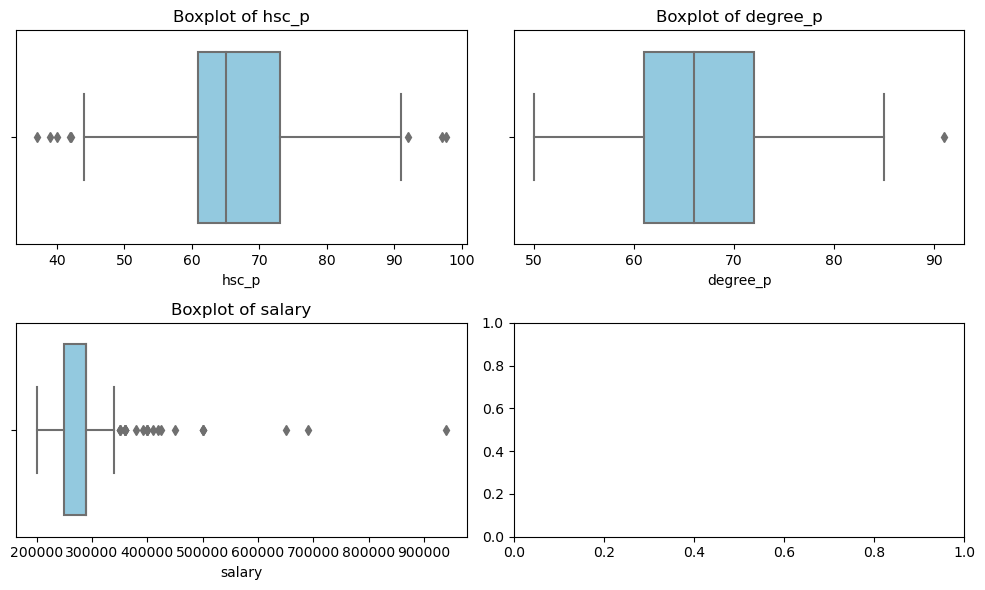

In [19]:
# Select columns for visualization
columns_to_visualize = ['hsc_p', 'degree_p', 'salary']

# Calculate the number of rows and columns for the subplot grid
num_columns = len(columns_to_visualize)
num_rows = int(np.ceil(num_columns / 2))

# Create a subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 6))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate over columns and create boxplots
for i, column in enumerate(columns_to_visualize):
    sns.boxplot(x = df_crp[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Data Preprocessing


* Data transformation, normalizarion, and scaling

### Exploring the correlation within features and the target variable:

* After analizing the frequency counts for Gender (0 and 1) and Status ('Placed' and 'Not Placed') as a Target variable, Status feature is categorical that represents the aspects whether a student will be recruited or not based on the percentage of marks obtained by students in their secondary school exams (ssc_p).

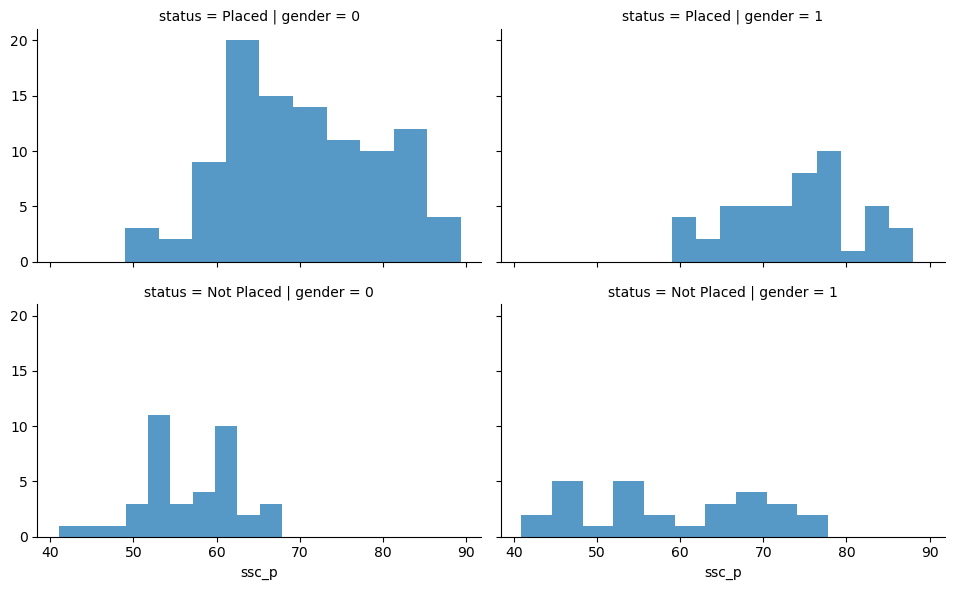

In [20]:
grid = sns.FacetGrid(df_crp, col='gender', row='status', aspect=1.6)
grid.map(plt.hist, 'ssc_p', alpha=.75, bins=10)
grid.add_legend()

* Additionally, the percentage or score obtained by a student in their MBA may influence whether a student will be recruited or not according to the following distribution.

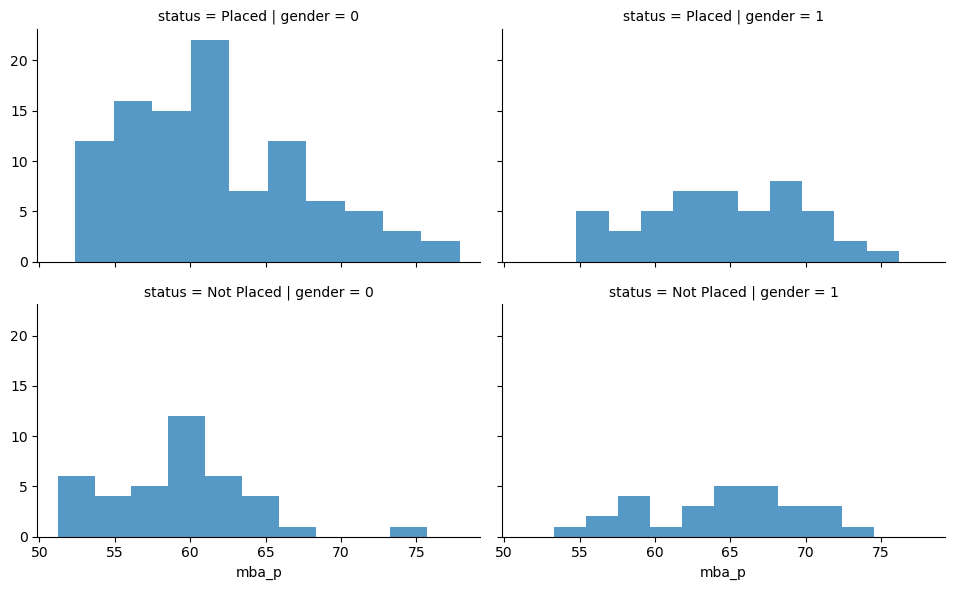

In [21]:
grid = sns.FacetGrid(df_crp, col='gender', row='status', aspect=1.6)
grid.map(plt.hist, 'mba_p', alpha=.75, bins=10)
grid.add_legend()

* There are more students placed with Sci&Tech degrees than others

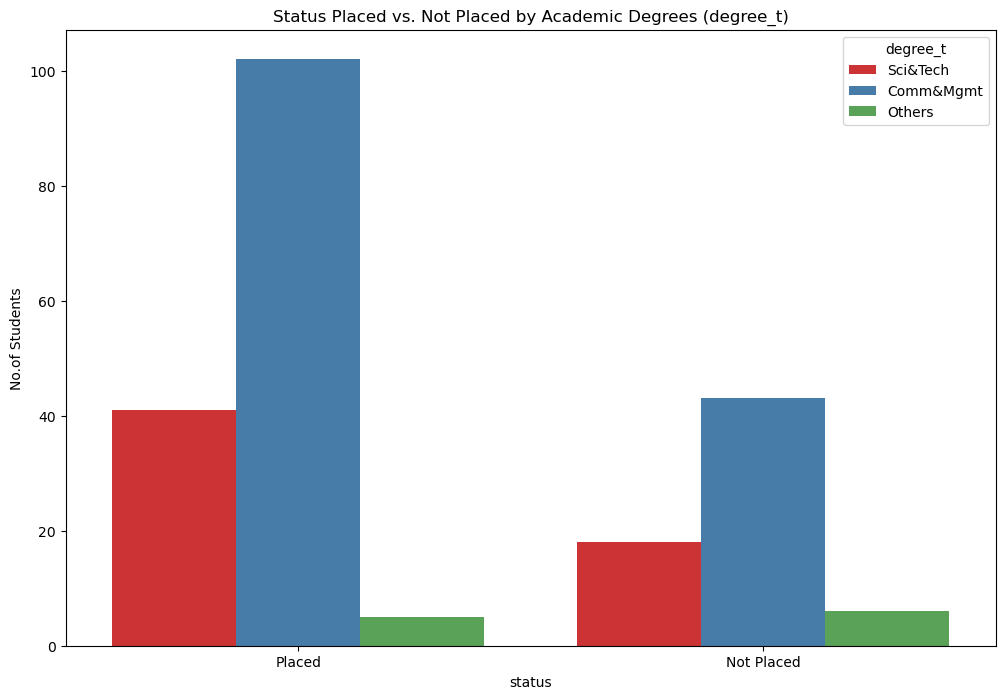

In [22]:
  plt.figure(figsize=(12,8))
  axis = sns.countplot(x = "status", hue = "degree_t", palette = "Set1", data = df_crp)
  axis.set(title = "Status Placed vs. Not Placed by Academic Degrees (degree_t)", xlabel = "status",ylabel = "No.of Students")
  plt.legend(loc='upper right', title='degree_t')
  plt.show()

In [23]:
# Using standardization for scaling data outliers

# For numeric columns
numeric_cols = ['hsc_p', 'degree_p', 'salary']

for column in numeric_cols:
  df_crp[numeric_cols] = (df_crp[numeric_cols] - df_crp[numeric_cols].mean()) / df_crp[numeric_cols].std()

df_crp.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,0,80.6,Others,1.437653,Others,Commerce,1.526051,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,1.437485e+00
211,212,0,58.0,Others,-0.581157,Others,Science,0.765051,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,-1.762945e-01
212,213,0,67.0,Others,0.061192,Others,Commerce,0.900944,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,8.191023e-02
213,214,1,74.0,Others,-0.030572,Others,Commerce,-1.137448,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,-1.092922e+00
214,215,0,62.0,Central,-0.764685,Others,Science,-1.816912,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,-1.979124e-16


* Feature Engineering

In [24]:
# Encoding the following columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert class (Secondary School Certificate) label to numbers
df_crp['ssc_b_en'] = le.fit_transform(df_crp['ssc_b'])

# Convert class (Higher Secondary Certificate) label to numbers
df_crp['hsc_b_en'] = le.fit_transform(df_crp['hsc_b'])

# Convert class (hsc_s) label to numbers
df_crp['hsc_s_en'] = le.fit_transform(df_crp['hsc_s'])

# Convert class (Academic Degree) label to numbers
df_crp['degree_t_en'] = le.fit_transform(df_crp['degree_t'])

# Convert class label (workex) to numbers
df_crp['workex_en'] = df_crp['workex'].map({'Yes':1, 'No':0})

# Convert class (Specialisation) label to numbers
df_crp['specialisation_en'] = le.fit_transform(df_crp['specialisation'])

# Define the Target class label to numbers
df_crp['Target'] = df_crp['status'].map({'Placed':1, 'Not Placed':0})

In [25]:
# Drop the other categorical variables
df_crp = df_crp.drop(['status', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'], axis=1)
df_crp

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_en,hsc_b_en,hsc_s_en,degree_t_en,workex_en,specialisation_en,Target
0,1,0,67.00,2.263530,-1.137448,55.0,58.80,-2.408457e-01,1,1,1,2,0,1,1
1,2,0,79.33,1.100879,1.509743,86.5,66.28,-1.144562e+00,0,1,2,2,1,0,1
2,3,0,65.00,0.152956,-0.322091,75.0,57.80,-4.990505e-01,0,0,0,0,0,0,1
3,4,0,56.00,-1.315270,-1.952804,66.0,59.43,-1.979124e-16,0,0,2,2,0,1,0
4,5,0,85.80,0.666835,0.941712,96.8,55.50,1.760241e+00,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1.437653,1.526051,91.0,74.49,1.437485e+00,1,1,1,0,0,0,1
211,212,0,58.00,-0.581157,0.765051,74.0,53.62,-1.762945e-01,1,1,2,2,0,0,1
212,213,0,67.00,0.061192,0.900944,59.0,69.72,8.191023e-02,1,1,1,0,1,0,1
213,214,1,74.00,-0.030572,-1.137448,70.0,60.23,-1.092922e+00,1,1,1,0,0,1,1


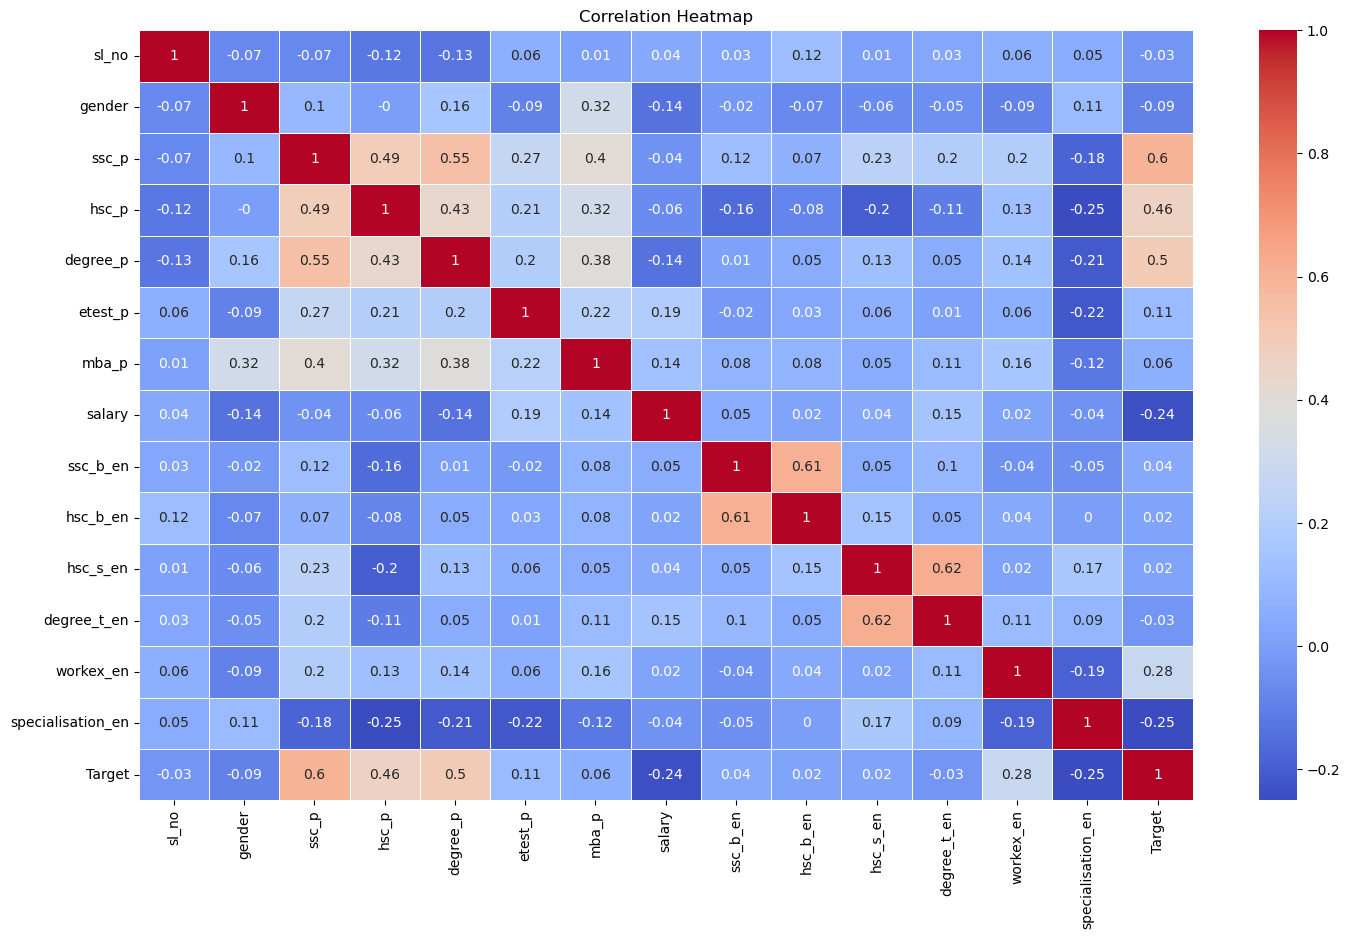

In [26]:
# Detecting multicollinearity to stop data leakage

# Compute the correlation matrix between all features
correlation_matrix = df_crp.corr(method='spearman').round(2)

plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth = 0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Split the data into input variables and target variables
X = df_crp.drop('Target', axis = 1) # Input variables
y = df_crp['Target'] # Target variable

* Feature Selection using Variance Inflation Factor

In [28]:
# Check multicollinearity using variance inflation factor to find the higher vif rate, e.g., mba_p, ssc_p, and etest_p have the highest rate)
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = pd.DataFrame()

df_vif['feature'] = X.columns
df_vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif

,feature,vif
0,sl_no,4.248582
1,gender,1.871857
2,ssc_p,67.479173
3,hsc_p,1.660447
4,degree_p,1.441318
5,etest_p,35.016539
6,mba_p,78.707981
7,salary,1.089732
8,ssc_b_en,3.356139
9,hsc_b_en,4.470412


In [29]:
# Drop the column that contains the highest vif value
X.drop(['mba_p', 'ssc_p', 'etest_p'], axis=1, inplace = True)

* Analyze dimensionality reduction using Principal Component Analysis (PCA)

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10) #Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Check how much variance is explained by each of the principal components
print("Score:", pca.explained_variance_ratio_)

Score: [0.17300091 0.15653837 0.13428929 0.11965203 0.08808144 0.07842636
 0.07493522 0.06527306 0.0452672  0.03881958]


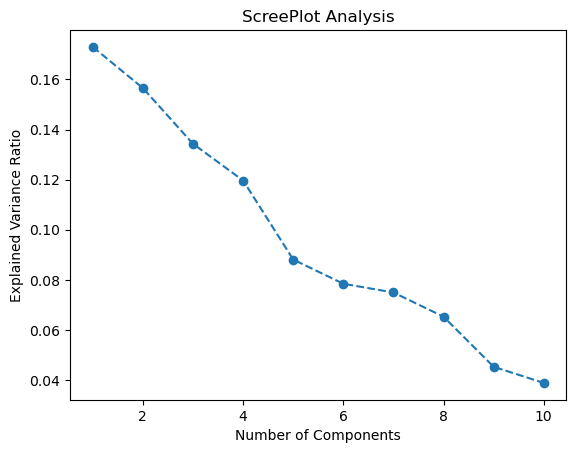

In [31]:
# Visualizing the results of eigenvalues (variances explained by each principal component)
import matplotlib.pyplot as plt

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('ScreePlot Analysis')
plt.show()

* The location of the elbow guides the decision on how many principal components to retain, specifically focusing on where the elbow occurs, indicating to be between 7 and 9 components capture the majority of the variation.

In [32]:
# Split the dataset into Train and Test
from sklearn.model_selection import train_test_split

# Split the model with parameter test_size as 0.30 when the test dataset is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

## Model Selection

Choosing models such as Logistic Regression, Support Vector Machine (SVM), Decision Tree, and Gaussian Naive Bayes offers a diverse exploration of machine learning algorithms, each with unique strengths are described as follows: 
* Logistic Regression is favored for its interpretability and probabilistic outputs, making it an efficient choice for binary classification. 
* SVM excels in high-dimensional spaces and with complex, separable boundaries, using versatile kernels to handle non-linear data. 
* Decision Trees provide clear, intuitive models that capture feature interactions and are easy to visualize. 
* Gaussian Naive Bayes is notable for its simplicity, computational efficiency, and effectiveness even with limited data, making it ideal for real-time predictions. 

All these models ensure robust performance across a wide range of problems and offer valuable insights from different algorithmic perspectives.

#### Logistic Regression

In [33]:
# Define the model
from sklearn.linear_model import LogisticRegression

# Initialize an object given the model
lr_clf = LogisticRegression()

# Train the Logistic Regression Model
lr_clf.fit(X_train, y_train)

LogisticRegression()

#### Support Vector Machine

In [34]:
# Define the model
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

#### Decision Tree Classifier Model

In [35]:
# Define the model  
from sklearn.tree import DecisionTreeClassifier

# Initialize an object given the model
dtc = DecisionTreeClassifier()

# Train the Multiple Linear Regression Model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
# Values accept for the target variable
y_train.value_counts()

1    104
0     46
Name: Target, dtype: int64

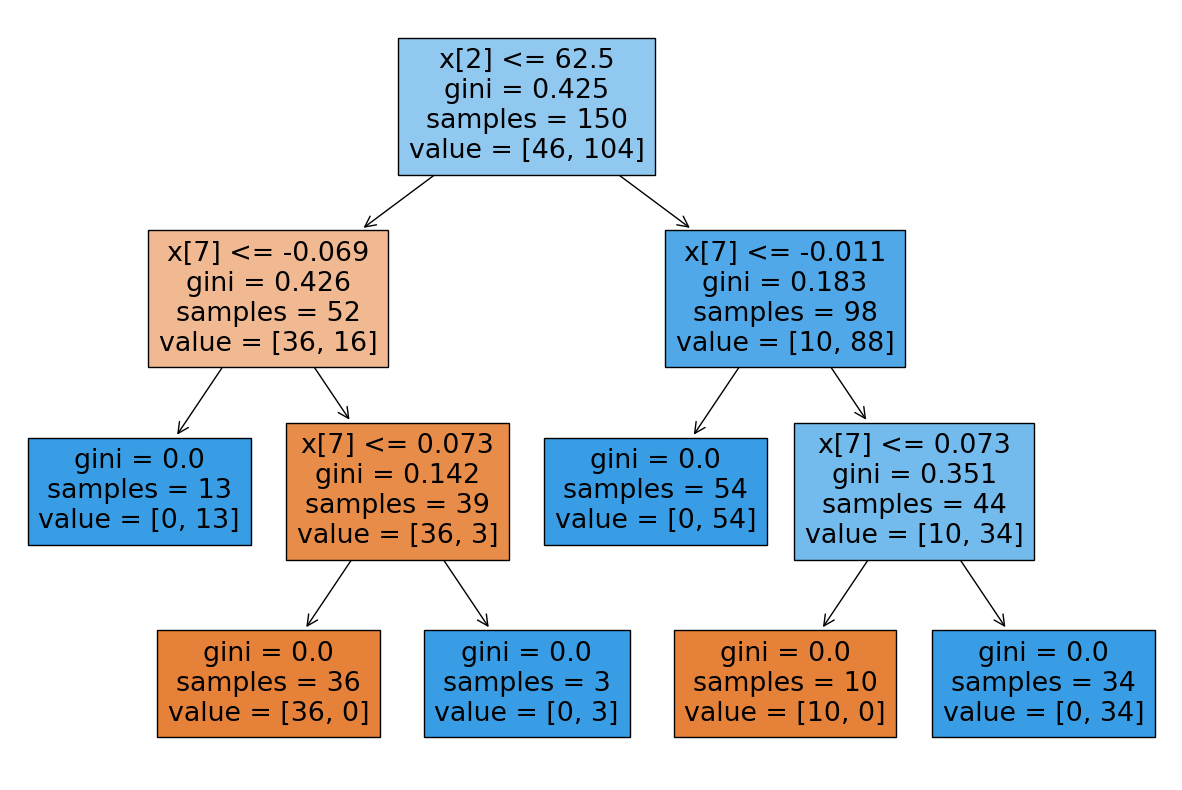

In [268]:
# Plot the decision tree 
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(dtc, filled = True)
plt.show()

#### Gaussian Naive Bayes Model

In [37]:
# Define the model 
from sklearn.naive_bayes import GaussianNB

# Initialize an object given the model
nb_clf = GaussianNB()

# Train the Gaussian NB Model
nb_clf.fit(X_train, y_train)

GaussianNB()

## Effective use of cross-validation and hyperparameter tuning

* Selecting the best hyperparameters to improve the model's performance

In [251]:
# Setting model to investigate best fit parameters by using each model as a estimator
# Define the dictionary for model names
models = {
        'Logistic_reg': LogisticRegression(),
        'SVC': SVC(),
        'Decision_tree': DecisionTreeClassifier()
        }

# Define the hyperparameter grid dictionary for each model
param_grids = {
              'Logistic_reg' : {'fit_intercept': [True, False]},
              'SVC' : { 'gamma': ['scale', 'auto']},
              'Decision_tree' : {'criterion':["gini", "entropy", "log_loss"], 'max_depth':[1,2,3,4,5], 
                                 'max_features':['auto', 'sqrt', 'log2']}
              }


# Initialize dicts for estimators and scores 
best_estimators = {}
best_scores = {}

for name, model in models.items():
    
    print(f"Performing grid search for {name}:")
    
    # Initialize GridSearchCV with the model and its corresponding parameter grid
    from sklearn.model_selection import GridSearchCV
    grd = GridSearchCV(estimator = model, param_grid = param_grids[name], cv = 5, scoring = 'neg_mean_squared_error')
    
    # Fit the model to the training data
    grd.fit(X_train, y_train)

    # Get the best estimator and its corresponding parameters
    best_estimators[name] = grd.best_estimator_
    best_scores[name] = mean_squared_error(y_test, grd.best_estimator_.predict(X_test))

    # Print the best model details
    print(f"Best model:{name}")
    print(f"Best params:{grd.best_params_}")
    print(f'Test MSE:{best_scores[name]}\n')
    


Performing grid search for Logistic_reg:
Best model:Logistic_reg
Best params:{'fit_intercept': True}
Test MSE:0.18461538461538463

Performing grid search for SVC:
Best model:SVC
Best params:{'gamma': 'scale'}
Test MSE:0.3230769230769231

Performing grid search for Decision_tree:
Best model:Decision_tree
Best params:{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}
Test MSE:0.23076923076923078



In [252]:
# Perform cross-validation for Gaussian Naive Bayes
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb_clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation scores
print("Cross-validation scores for MSE:", scores)
print("Average cross-validation for MSE:", scores.mean())

Cross-validation scores for MSE: [-0. -0. -0. -0. -0.]
Average cross-validation for MSE: 0.0


In summary, Gaussian Naive Bayes had the best performance with the lowest test MSE. Logistic Regression was a close second, suggesting a good balance between bias and variance without overfitting. Additionally, Support Vector Machine had the highest test MSE, indicating that it was the least effective model for this particular dataset worse than Decision Tree that was the third best model.

## Test and Evaluation the Models 

In [281]:
# Define metric to evaluate models ahead
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score

#### Logistic Regression

In [253]:
# Testing the Logistic Regression Model
y_pred_lr = lr_clf.predict(X_test)
y_pred_lr

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [271]:
# Evaluate Logistic Regression after using hyperparameter tuning

# Initialize an object given the model
lr_clf = LogisticRegression(fit_intercept=True)

# Train the Logistic Regression Model
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Precision Score:", precision_score(y_test, y_pred_lr))
print("Recall Score:", recall_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))

Accuracy Score: 0.8153846153846154
Confusion Matrix:
 [[13  8]
 [ 4 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.83      0.91      0.87        44

    accuracy                           0.82        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.81      0.82      0.81        65

F1 Score: 0.8695652173913043
Precision Score: 0.8333333333333334
Recall Score: 0.9090909090909091
ROC AUC Score: 0.7640692640692641


* The model achieves an accuracy score of 0.815, indicating it correctly predicts 81.5% of cases. The confusion matrix shows 13 true negatives and 40 true positives, with 8 false negatives and 4 false positives. The precision and recall for Class 0 are 0.76 and 0.62, respectively, while for Class 1, they are 0.83 and 0.91, respectively. 

* This indicates the model's ability to correctly identify both classes, with higher precision and recall for Class 1. The F1 score for the model is 0.870, reflecting a balanced measure of precision and recall across both classes. The ROC AUC score of 0.764 suggests the model's ability to distinguish between classes better than random guessing.

* In summary, the model demonstrates strong performance with high accuracy, precision, recall, and F1 score, particularly for Class 1. These metrics indicate effective predictive capabilities across the dataset, with room for further optimization to improve performance metrics, especially for Class 0.

#### Support Vector Machine

In [260]:
# Testing SVC Model
y_pred_svm = svm_clf.predict(X_test)
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [265]:
# Evaluating SVC using Metrics after using hyperparameter tuning

svm_clf = SVC(gamma = 'scale')
svm_clf.fit(X_train, y_train)
y_pred_grd = svm_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_grd))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grd))
print("Classification Report:\n", classification_report(y_test, y_pred_grd))
print("F1 Score:", f1_score(y_test, y_pred_grd))
print("Precision Score:", precision_score(y_test, y_pred_grd))
print("Recall Score:", recall_score(y_test, y_pred_grd))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_grd))

Accuracy Score: 0.676923076923077
Confusion Matrix:
 [[ 0 21]
 [ 0 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.68      1.00      0.81        44

    accuracy                           0.68        65
   macro avg       0.34      0.50      0.40        65
weighted avg       0.46      0.68      0.55        65

F1 Score: 0.8073394495412844
Precision Score: 0.676923076923077
Recall Score: 1.0
ROC AUC Score: 0.5


* The model achieves an accuracy score of 0.677, indicating it correctly predicts 67.7% of cases. However, it only correctly identifies instances of Class 1, with Class 0 predictions being entirely inaccurate (precision 0.00, recall 0.00). The F1 score for Class 1 is 0.807, reflecting a balanced measure of precision and recall. 

* The overall precision for the model is 0.677, indicating its reliability in predicting Class 1 instances. The ROC AUC score of 0.5 suggests the model's inability to distinguish between classes better than random guessing.

* In summary, while the model shows high accuracy in predicting Class 1, its performance is severely limited by its inability to predict Class 0. This imbalance results in low overall metrics for Class 0 and affects the model's capability to generalize across both classes effectively. Further refinement is necessary to address these limitations and improve overall model performance across all metrics.

#### Decision Tree Classifier Model

In [269]:
# Testing Decision Tree Classifier Model
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [270]:
# Evaluating Decition Tree using Metrics 
print("Accuracy Score:", accuracy_score(y_test, y_pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Classification Report:\n", classification_report(y_test, y_pred_dtc))
print("F1 Score:", f1_score(y_test, y_pred_dtc))
print("Precision Score:", precision_score(y_test, y_pred_dtc))
print("Recall Score:", recall_score(y_test, y_pred_dtc))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dtc))

Accuracy Score: 0.9846153846153847
Confusion Matrix:
 [[21  0]
 [ 1 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        44

    accuracy                           0.98        65
   macro avg       0.98      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65

F1 Score: 0.9885057471264368
Precision Score: 1.0
Recall Score: 0.9772727272727273
ROC AUC Score: 0.9886363636363636


* The model achieves an exceptional accuracy score of 0.985, indicating it correctly predicts 98.5% of cases. 
The confusion matrix shows 21 true negatives and 43 true positives, with 0 false negatives and 1 false positive. 
Both precision and recall are excellent across both classes, with precision scores of 0.95 for Class 0 and 1.00 for Class 1, and recall scores of 1.00 for Class 0 and 0.98 for Class 1. 
* The F1 score for the model is 0.989, reflecting a harmonious balance between precision and recall across both classes. The ROC AUC score of 0.989 indicates outstanding discriminative ability between classes.
* In summary, the model demonstrates outstanding performance with near-perfect accuracy, precision, recall, F1 score, and ROC AUC score. These metrics indicate highly reliable predictions across the dataset, suggesting robustness and effectiveness in classification tasks.

#### Gaussian Naive Bayes Model

In [279]:
# Testing Decision Tree Classifier Model
y_pred_nb = nb_clf.predict(X_test)
y_pred_nb

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [282]:
# Evaluating Gaussian NB using Metrics 
print("Accuracy Score:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Precision Score:", precision_score(y_test, y_pred_nb))
print("Recall Score:", recall_score(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_nb))

Accuracy Score: 1.0
Confusion Matrix:
 [[21  0]
 [ 0 44]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
ROC AUC Score: 1.0


* The model achieves a perfect accuracy score of 1.0, indicating it correctly predicts 100% of cases. The confusion matrix shows 21 true negatives and 44 true positives, with 0 false negatives and 0 false positives, highlighting flawless performance in both classes. Both precision and recall are perfect across both classes, with scores of 1.0 for precision and recall. 
* The F1 score for the model is also 1.0, reflecting perfect harmonic balance between precision and recall across both classes. The ROC AUC score of 1.0 indicates optimal discriminative ability between classes.

* In summary, the model demonstrates flawless performance with perfect accuracy, precision, recall, F1 score, and ROC AUC score. These metrics indicate the model's exceptional reliability and effectiveness in accurately classifying instances across the dataset, showcasing its robustness in classification tasks.

## Voting Classifier

In [38]:
# Import Voting Libraries
from sklearn.ensemble import VotingClassifier
# Define the models chosen
ensemble_clf = VotingClassifier(estimators=[('Logistic_reg', lr_clf), ("SVC clf",svm_clf), ("Decision_tree", dtc), ("Gaussian NB", nb_clf)])

In [39]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic_reg', LogisticRegression()),
                             ('SVC clf', SVC()),
                             ('Decision_tree', DecisionTreeClassifier()),
                             ('Gaussian NB', GaussianNB())])

In [276]:
y_pred = ensemble_clf.predict(X_test)

In [277]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

* An accuracy score of 1.0 for Gaussian Naive Bayes (GaussianNB) indicates perfect classification performance on both training and testing data. This outcome is supported by GaussianNB's assumption of feature independence and normal distribution within classes, which, when true for the dataset, enables accurate modeling of data distribution and precise instance classification. 
* Additionally, datasets with distinct, well-separated classes that conform to GaussianNB's assumptions facilitate clear decision boundaries, thereby allowing the model to classify instances without errors. 
* High-quality data, devoid of noise or outliers, and effective preprocessing steps like feature scaling further enhance GaussianNB's performance by ensuring accurate data representation. 
* However, to validate such high accuracy, it's crucial to verify that the reported score is not a result of overfitting. 
* Utilizing techniques such as cross-validation or testing on independent datasets helps assess the model's ability to generalize beyond the training data. Despite its simplicity and low computational requirements compared to more complex models, GaussianNB can achieve robust performance in scenarios where its assumptions align closely with the data distribution.